### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

i should have read this first https://engineeringfordatascience.com/posts/visualising_asset_price_correlations/

In [1]:
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

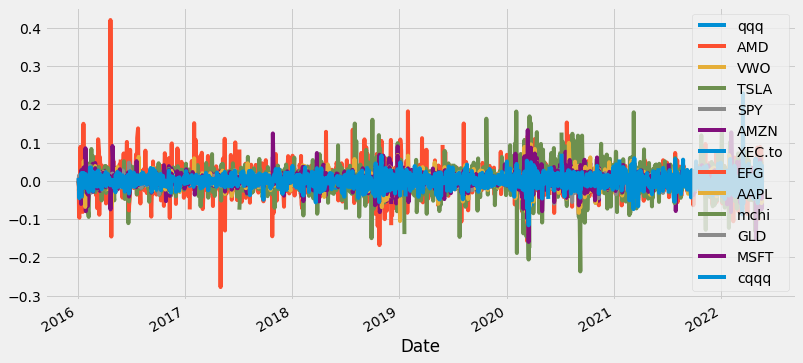

In [2]:
USE_LOG_RETURN = True
# // should add the ETFs: TIT and TEC 


# // Demo - Hand select random stocks. Plot titles will be inaccuratly title "{index_1}...."
ls = ['SPY', 'AAPL', 'AMZN', 'AMD', 'MSFT', 'GLD', 'TSLA', 'XEC.to', 'VWO', 'EFG', 'qqq', 'cqqq', 'mchi']

# // HMMJ.to a weed ETF
# ls = ['HMMJ.to','ogi','hexo','cweb','smg','tlry','acb','cron','weed.TO'] # ,'weed'

# // XEG.to a Canadian Oil and Gas ETF, which I've traded a lot
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to','PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted

# // FNGU a 3x Tech ETN 
# ls = ['FNGU','AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR'] # FNGU ETF. MSFT has a very high corr with FNGU
# ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ETF = ls[0]
ls  = list(set(ls))



data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [3]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(1634, 13)

(1575, 13)

,qqq,AMD,VWO,TSLA,SPY,AMZN,XEC.to,EFG,AAPL,mchi,GLD,MSFT,cqqq
Date,,,,,,,,,,,,,
2016-01-05,-0.001737,-0.007246,0.002200,0.000090,0.001690,-0.005036,0.007186,-0.002272,-0.025379,-0.000929,0.002815,0.004552,0.008041
2016-01-06,-0.009652,-0.091318,-0.018059,-0.019844,-0.012695,-0.001800,-0.010557,-0.017134,-0.019763,-0.016874,0.014337,-0.018332,-0.011508
2016-01-07,-0.031814,-0.096107,-0.032822,-0.015598,-0.024284,-0.039841,-0.028377,-0.016491,-0.043121,-0.041748,0.014041,-0.035402,-0.045281
2016-01-08,-0.008235,-0.063370,-0.008960,-0.021799,-0.011038,-0.001465,-0.008473,-0.012628,0.005274,-0.014896,-0.004438,0.003062,-0.006073
2016-01-11,0.003072,0.089345,-0.004343,-0.015041,0.000990,0.017457,0.005490,0.004596,0.016063,-0.004261,-0.008935,-0.000574,-0.021864


In [4]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

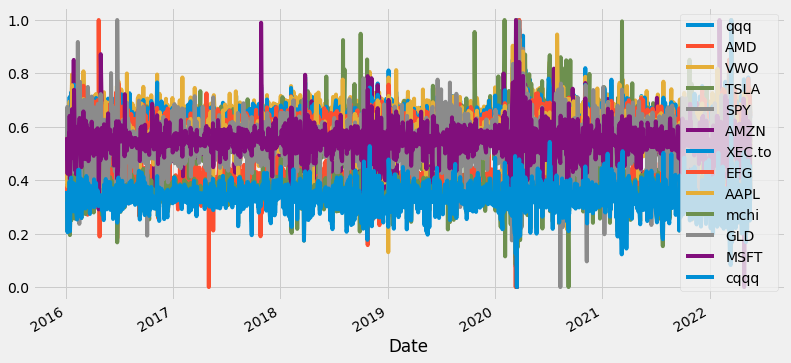

In [5]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = scale_data(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [6]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,qqq,AMD,VWO,TSLA,SPY,AMZN,XEC.to,EFG,AAPL,mchi,GLD,MSFT,cqqq
qqq,1.000000,0.578416,0.660345,0.495158,0.882390,0.768839,0.616972,0.729241,0.793144,0.634398,-0.032632,0.838860,0.610072
AMD,1.578416,1.578416,1.080208,0.860904,1.375660,1.228312,1.006933,1.143215,1.241531,1.033173,-0.045241,1.310003,1.006380
VWO,2.238761,1.998279,2.080208,1.219413,2.073763,1.700920,1.885294,1.914284,1.761979,1.926666,0.057877,1.837881,1.809363
TSLA,2.733919,2.364025,2.438717,2.219413,2.486359,2.080467,2.211292,2.261633,2.143481,2.285421,0.040688,2.214906,2.181873
SPY,3.616310,2.857294,3.136820,2.632009,3.486359,2.689071,2.817480,3.060631,2.831329,2.898320,-0.010392,2.959026,2.751393
AMZN,4.385149,3.316767,3.609429,3.011556,4.094963,3.689071,3.270444,3.567278,3.426387,3.374120,-0.044933,3.620317,3.219287
XEC.to,5.002121,3.706728,4.487789,3.337553,4.701152,4.142034,4.270444,4.225382,3.912494,4.212550,-0.046203,4.123046,3.976328
EFG,5.731361,4.120702,5.258859,3.684902,5.500150,4.648682,4.928547,5.225382,4.473954,4.884310,0.035006,4.736338,4.586730
AAPL,6.524506,4.569089,5.779307,4.066404,6.187998,5.243740,5.414654,5.786841,5.473954,5.372332,-0.000089,5.385615,5.048728
mchi,7.158903,4.967864,6.672800,4.425159,6.800897,5.719540,6.253084,6.458602,5.961976,6.372332,0.020673,5.890846,5.955036


In [7]:
# corrwith = stocks_norm.corr()
# corr_cumSum = corrwith.cumsum()
# corr_cumSum

In [8]:
stocks_norm_spearmanr_cumSum.sort_values(ETF, inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3
top_N = stocks.columns.shape[0]# // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns.to_list()
if ETF not in keepThese:
    keepThese.append(ETF)

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows. wont work well with code below (networkx)
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr = corr - np.eye(len(corr))
# corr

In [9]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

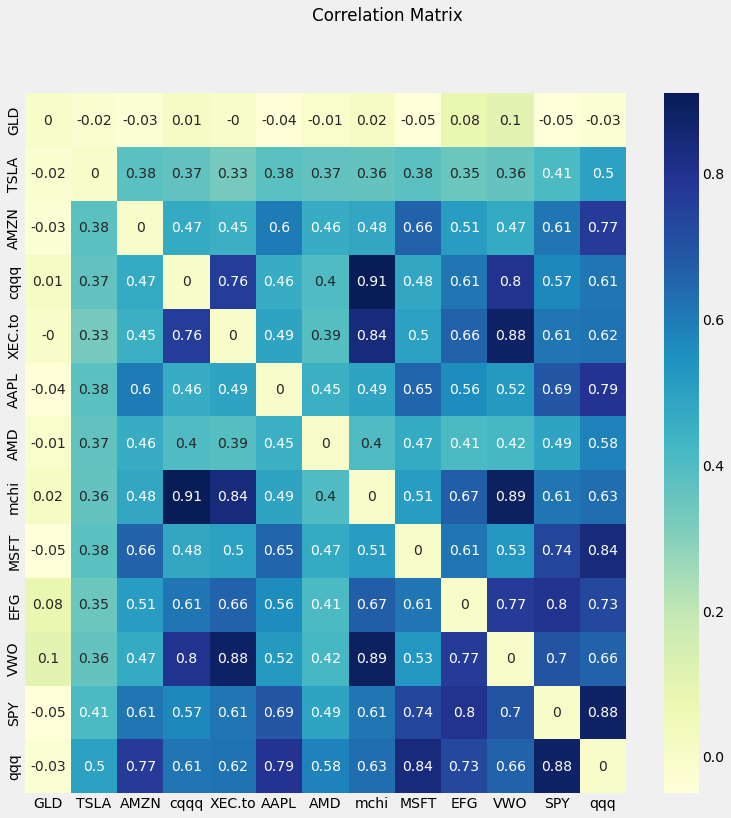

In [10]:
_=plt.subplots(figsize=(12, 12))
_=plt.suptitle("Correlation Matrix")
_=sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [11]:
numb_edges = 10

# pos_corr_mat = np.where(corr_mat >= avg, corr_mat, 0)
all = corr.values.flatten()
all = all[all.nonzero()]
all = np.sort(all)[::-1]
# thresh = np.average(all) + 2*np.std(all)
thresh = all[numb_edges]


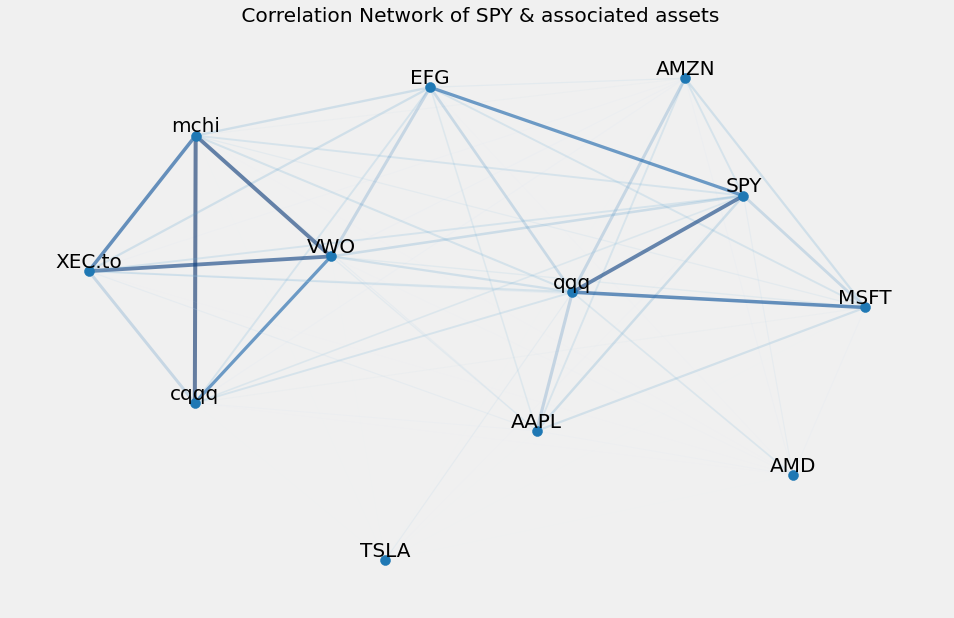

In [12]:
_=plt.figure(figsize=(15, 10))
_=plt.title(f" Correlation Network of {ETF} & associated assets")

G=nx.Graph()
# G=graph

for i in range(len(corr)):
  for j in range(len(corr)):
    if i!=j: # doesnt work.... 
      if np.abs(corr.iloc[i,j]) > 0.25:
        G.add_edge(keepThese[i], keepThese[j], weight=corr.iloc[i,j])

# for i in G.nodes():
#     G.remove_edge(i, i)


# positions for all nodes
pos=nx.fruchterman_reingold_layout(G) # Position nodes using Fruchterman-Reingold force-directed algorithm
# pos=nx.spring_layout(G) # *same as above
# pos=nx.circular_layout(G) # Position nodes on a circle
# pos=nx.spectral_layout(G) # Position nodes using the eigenvectors of the graph Laplacian


# nodes
_=nx.draw_networkx_nodes(G,pos, node_size=100)


# Two types of egdes
# elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= thresh]
# esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < thresh]
# _=nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                     width=1.5,alpha=0.25,edge_color='r') # ,style='dashed'
# _=nx.draw_networkx_edges(G,pos,edgelist=elarge,
#                     width=3,alpha=1,edge_color='g')
# ###############################################################################

# continuous width & alpha of edges 
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
weights_scaled = scale_data(weights)
width = np.array(weights_scaled) * 4

weights_shewed = np.log(weights_scaled+1, where=weights_scaled != 0) # force a right shew
alpha = scale_data(weights_shewed)
alpha = np.where(alpha < .35, .1, alpha)
alpha = np.where((alpha > .35) & (alpha < .85), .2, alpha)
alpha = np.where(alpha > .85, .6, alpha)
# alpha

_=nx.draw_networkx_edges(G,pos, alpha=alpha, width=width,
  edge_color=weights_scaled, edge_cmap=plt.cm.Blues)
# ###############################################################################

# labels
_=nx.draw_networkx_labels(G,pos, font_size=20, verticalalignment='bottom')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [13]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

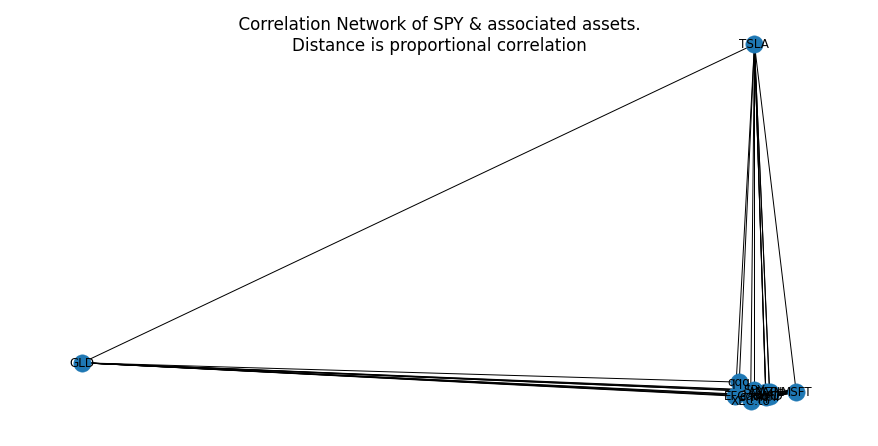

In [14]:
_=plt.suptitle(f" Correlation Network of {ETF} & associated assets. \nDistance is proportional correlation")
nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

# # corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

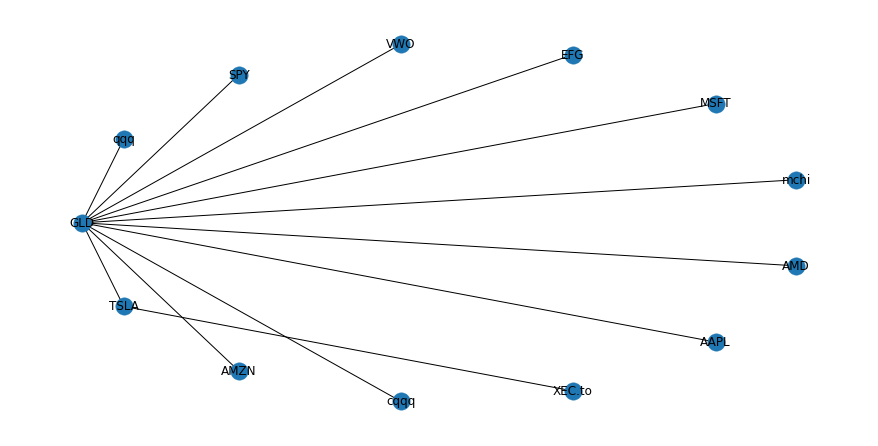

In [15]:
# # spanning tree 
span = nx.minimum_spanning_tree(graph)
nx.draw_shell(span, with_labels=True)